### Import librairies

In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
from bs4 import BeautifulSoup

### reading file

In [2]:
articles = pd.read_csv("article data.csv")
citations = pd.read_csv("citations.csv")

In [3]:
articles.head(2)

,externalid,resourcetype,title,lead,text,section,is_premium,authors,first_published,last_updated,tags,target
0,635888296326,article,"Adrien Briffod, une cinquième place au goût de...","Jusqu’à 500 m de la ligne d’arrivée, il a cont...","Ce week-end, la chaîne L’Équipe 21 diffusait l...",sports,False,[Jean Ammann],2021-08-23 08:43:45.000,2022-02-26 15:51:21.405,"{gs_tag,pos_ukraine_russian_invasion},{gs_tag,...",24heures
1,41644755,article,Iran: Le processus pour produire de l’uranium ...,NaN,"<div class=""lg""><p class=""p""><a class=""documen...",iran,NaN,[AFP],2021-01-04 12:29:48.000,2021-01-05 05:01:00.155,"{gs_tag,gs_politics_misc},{gs_tag,gs_law_misc}...",24heures


In [4]:
citations.head(2)

,Unnamed: 0,speaker,speaker_index,quote,quote_index,verb,verb_index,quote_token_count,quote_type,is_floating_quote,reference,speaker_gender,externalid
0,0,Marc Ogorek,"(1377, 1388)",ne pas faire tout cela par plaisir,"(1396, 1430)",assure,"(1389, 1395)",6,SVC,False,Marc Ogorek,male,100020966494
1,1,Cheveux frisés et sourcils broussailleux,"(2955, 2996)","qu’en temps normal, il réalise trois quarts de...","(3079, 3210)",explique,"(3070, 3078)",23,SVC,False,Cheveux frisés et sourcils broussailleux,unknown,100020966494


In [5]:
citations = citations.replace(to_replace={'male':'homme', 'female': 'femme'}, inplace=False)

In [6]:
citations.head(2)

,Unnamed: 0,speaker,speaker_index,quote,quote_index,verb,verb_index,quote_token_count,quote_type,is_floating_quote,reference,speaker_gender,externalid
0,0,Marc Ogorek,"(1377, 1388)",ne pas faire tout cela par plaisir,"(1396, 1430)",assure,"(1389, 1395)",6,SVC,False,Marc Ogorek,homme,100020966494
1,1,Cheveux frisés et sourcils broussailleux,"(2955, 2996)","qu’en temps normal, il réalise trois quarts de...","(3079, 3210)",explique,"(3070, 3078)",23,SVC,False,Cheveux frisés et sourcils broussailleux,unknown,100020966494


### Function to get the number of characters in a text file

In [7]:
def get_nb(text):
#open file in read mode
    try:
        soup = BeautifulSoup(text, "html.parser")
    except: 
        if (np.isnan(text)):
            return np.nan
    data = soup.text
    # print(data)
    #get the length of the data

    number_of_characters = len(str(data))

    return number_of_characters

### Create a dictionnary to store the couple (file, number_of_char)

In [8]:
text_size = {}
for i in tqdm(range(len(articles))):
    text_size[articles.iloc[i]["externalid"]] = get_nb(articles.iloc[i]["text"])

### Print some characteristic of the distribution

In [9]:
mean, _, _ = np.nanmean(list(text_size.values())), np.nanmedian(list(text_size.values())), np.nanstd(list(text_size.values()))

In [10]:
mean

2946.2955523672886

### Use 3000 due to previous results

In [11]:
SIZE = 3000

### Create a pandas dataframe to store data

In [12]:
citations["text_size"] = int(mean)
for i in tqdm(range(len(citations))):
            citations["text_size"][i] = text_size[citations.iloc[i]["externalid"]]
       

In [13]:
np.unique(citations["text_size"].values, return_counts=True)

(array([  256,   360,   378, ..., 25953, 27079, 35702]),
 array([ 1,  3,  1, ..., 89, 83, 77]))

### Work only with "speaker_gender" and "text_size"

In [14]:
my_df = citations[["speaker_gender", "text_size"]]
my_df_male = my_df[my_df.speaker_gender == "homme"]
my_df_female = my_df[my_df.speaker_gender == "femme"]

### Find the proportion

In [15]:
m = len(my_df_male )
m_l = len(my_df_male[my_df_male.text_size>3000])
f = len(my_df_female )
f_l = len(my_df_female[my_df_female.text_size>3000])

In [16]:
m,f

(26840, 8227)

In [17]:
m_l, f_l

(18216, 5743)

### Plot the distribution

([<matplotlib.axis.XTick at 0x7f9d84a473d0>,
 <a list of 2 Text xticklabel objects>)

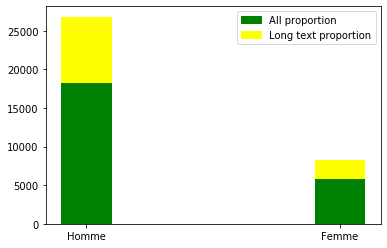

In [18]:
barWidth = 0.2
y1 = [m_l, f_l]
y2 = [m - m_l, f - f_l]
r = range(len(y1))

plt.bar(r, y1, width = barWidth, color = ['green' for i in y1],
        linestyle = 'solid',
           linewidth = 3)
plt.bar(r, y2, width = barWidth, bottom = y1, color = ['yellow' for i in y1],
           linestyle = 'dotted',
           linewidth = 3)
colors = {'All proportion':'green', 'Long text proportion':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks(range(len(y1)), ['Homme', 'Femme'])



([<matplotlib.axis.XTick at 0x7f9d84ac3dd0>,
 <a list of 2 Text xticklabel objects>)

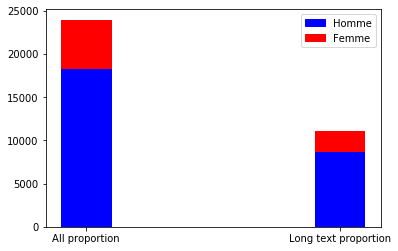

In [19]:
barWidth = 0.2
y1 = [m_l, m - m_l]
y2 = [f_l, f - f_l]
r = range(len(y1))

plt.bar(r, y1, width = barWidth, color = ['blue' for i in y1],
        linestyle = 'solid',
           linewidth = 3)
plt.bar(r, y2, width = barWidth, bottom = y1, color = ['red' for i in y1],
           linestyle = 'dotted',
           linewidth = 3)
colors = {'Homme':'blue', 'Femme':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks(range(len(y1)), ['All proportion', 'Long text proportion'])

